# Homework 5: Simulation, Sampling, and Hypothesis Testing

## Due Tuesday, November 8th at 11:59PM

Welcome to Homework 5! This homework will cover:
- Simulations (see [CIT 9.3-9.4](https://inferentialthinking.com/chapters/09/3/Simulation.html))
- Sampling and Empirical Distributions (see [CIT 10-10.4](https://inferentialthinking.com/chapters/10/Sampling_and_Empirical_Distributions.html))
- Models and Hypothesis Testing (see [CIT 11.2](https://inferentialthinking.com/chapters/11/2/Multiple_Categories.html))

### Instructions

This assignment is due on Tuesday, November 8th at 11:59PM. You are given six slip days throughout the quarter to extend deadlines. See the syllabus for more details. With the exception of using slip days, late work will not be accepted unless you have made special arrangements with your instructor.

**Important**: For homeworks, the `otter` tests don't usually tell you that your answer is correct. More often, they help catch careless mistakes. It's up to you to ensure that your answer is correct. If you're not sure, ask someone (not for the answer, but for some guidance about your approach). These are great questions for office hours (see the schedule on the [Calendar](https://dsc10.com/calendar)) or EdStem. Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged.

In [1]:
# Please don't change this cell, but do make sure to run it.
import babypandas as bpd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')

import otter
grader = otter.Notebook()

import warnings
warnings.simplefilter('ignore')

%reload_ext pandas_tutor

## 1. Lucky Triton Lotto, Continued  🔱 🎱 🧜

In the last homework, we calculated the probability of winning the grand prize (free housing) on a Lucky Triton Lotto lottery ticket, and found that it was quite low 😭.

In [2]:
# Just run this cell, do not change it!
free_housing_chance = (1 / 62) * (1 / 61) * (1 / 60) * (1 / 59) * (1 / 58) * (1 / 16)
free_housing_chance

8.048727744688277e-11

In this question, we'll approach the same question not using math, but using simulation. 

It's important to remember how this lottery works:
- When you buy a Lucky Triton Lotto ticket, you first pick five different numbers, one at a time, from 1 to 62. Then you separately pick a number from 1 to 16, which may or may not be the same as one of the first five. These are **your numbers**. For example, you may select (15, 1, 13, 3, 61, 8). This is a sequence of six numbers - **order matters**!
- The **winning numbers** are chosen by King Triton drawing five balls, one at a time, **without replacement**, from a pot of white balls numbered 1 to 62. Then, he draws a gold ball, the Tritonball, from a pot of gold balls numbered 1 to 16. Both pots are completely separate, hence the different ball colors. For example, maybe the winning numbers are (13, 15, 62, 3, 5, 8).

We’ll assume for this problem that in order to win the grand prize (free housing), all six of your numbers need to match the winning numbers and be in the **exact same positions**. In other words, your entire sequence of numbers must be exactly the same. However, if some numbers in your sequence match up with the corresponding number in the winning sequence, you will still win some Triton Cash. 

Suppose again that your numbers are (15, 1, 13, 3, 61, 8) and the winning numbers are (13, 15, 62, 3, 5, 8). In this case, two of your numbers are considered to match two of the winning numbers. Notice that although both sequences include the number 15 within the first five numbers (representing a white ball), since they are in different positions, that's not considered a match.

- Your numbers: (15, 1, 13, **3**, 61, **8**)
- Winning numbers: (13, 15, 62, **3**, 5, **8**)

**Question 1.1.** Write a function called `simulate_one_ticket`. It should take no arguments, and it should return an array with 6 random numbers, simulating how the numbers are selected for a single Lucky Triton Lotto ticket. The first five numbers should all be randomly chosen without replacement, from 1 to 62. The last number should be between 1 and 16.

In [3]:
def simulate_one_ticket():
    """Simulate one Lucky Triton Lotto ticket."""
    return np.append(np.random.choice(np.arange(1,63), 5, replace=False), np.random.choice(np.arange(1,17)))

# for i in range(10):
#     print(simulate_one_ticket())

In [4]:
grader.check("q1_1")

q1_1 results: All test cases passed!

**Question 1.2.** It's draw day. You checked the winning numbers King Triton drew, which happened to be **(55, 12, 3, 51, 23, 5)**. You didn't win free housing, and you are quite sad.

Suppose you want to remind yourself how unlikely it is to win the grand prize. Call the function `simulate_one_ticket` 100,000 times. In your 100,000 tickets, **how many times did you win the grand prize (free housing)?** Assign your answer to `count_free_housing`. (It would cost a fortune if you were to buy 100,000 tickets – it's pretty nice to be able to simulate this experiment instead of doing it in real life!) 

*Hints*:

- First, implement a simulation where you only buy 10 tickets. Once you are sure you have that figured out, change it to 100,000 tickets. It may take a little while (up to a minute) for Python to perform the calculations when you are buying 100,000 tickets.

- You'll have to count how many of the numbers you chose match the numbers that were drawn. One way to do this involves [`np.count_nonzero`](https://numpy.org/doc/stable/reference/generated/numpy.count_nonzero.html). Remember you need **all** the numbers to match to win the grand prize.

In [5]:
count_free_housing = 0
repetitions = 100000
winning_numbers = np.array([55, 12, 3, 51, 23, 5])

for i in range(repetitions):
    if simulate_one_ticket in winning_numbers:
        count_free_housing = count_free_housing + 1
count_free_housing

0

In [6]:
grader.check("q1_2")

q1_2 results: All test cases passed!

Remember, the mathematical probability of winning free housing is quite low, on the order of $10^{-11}$. That's a lot lower than than 1 in 100,000, which is $10^{-5}$.

**Question 1.3.** As we've seen, you would need to be extremely lucky to win the grand prize. To encourage more students to buy Lucky Triton Lotto tickets, students can win Triton Cash if some of their numbers match the corresponding winning numbers, as described in the introduction. Again, simulate the act of buying 100,000 tickets, but this time find **the greatest number of matches achieved by any of your tickets**, and assign this number to `most_matches`. 

The winning numbers are the same from the previous part: **(55, 12, 3, 51, 23, 5)**.

For example, if 90,000 of your tickets matched 1 winning number and 10,000 of your tickets matched 2 winning numbers, then you would set `most_matches` to 2. If 99,999 of your tickets matched 1 winning number and one of your tickets matched 4 winning numbers, you would set `most_matches` to 4. If you happened to win the grand prize on one of your tickets, you would set `most_matches` to 6. Remember, order matters.

*Hint*: There are several ways to approach this; one way involves storing the number of matches per ticket in an array and finding the largest number in that array. 

In [7]:
matches = np.array([])
repetitions = 100000
winning_numbers = np.array([55, 12, 3, 51, 23, 5])

for i in range(repetitions):
    sim = simulate_one_ticket()
    match = 0
    for j in range(len(winning_numbers)):
        if sim[j] == winning_numbers[j]:
            match = match + 1
    matches = np.append(matches, match)
    
most_matches = matches.max()
most_matches

4.0

In [8]:
grader.check("q1_3")

q1_3 results: All test cases passed!

**Question 1.4.** Suppose one Lucky Triton Lotto ticket costs $2.

The Lucky Triton Lotto advertisement on Instagram promises you will never lose money because of the following generous prizes:

- Win $10 with a 1-number match

- Win $25 with a 2-number match

- Win $100 with a 3-number match

- Win $1,000 with a 4-number match

- Win $5,000 with a 5-number match

- Win $20,000 with a 6-number match (free housing!)

If you had the money to buy 100,000 tickets, what would be your net winnings from buying these tickets? Since this is net winnings, this should account for the prizes you win and the cost of buying the tickets. Assign the amount to `net_winnings`. Note that a positive value means you won money overall, and a negative value means you lost money overall. Do you believe the advertisement's claims?

The winning numbers are the same from the previous part: **(55, 12, 3, 51, 23, 5)**.

*Hint*: Again, there are a few ways you could approach this problem. One way involves generating another 100,000 random tickets and counting the amount earned per ticket, adding to a running total. Alternatively, if you created an array of the number of matches per ticket in Question 1.3, you could loop through that array.

In [9]:
repetitions = 100000
net_winnings = -2 * repetitions

for i in matches:
    if i == 6:
        net_winnings = net_winnings + 20000
    elif i == 5:
        net_winnings = net_winnings + 5000
    elif i == 4:
        net_winnings = net_winnings + 1000
    elif i == 3:
        net_winnings = net_winnings + 100
    elif i == 2:
        net_winnings = net_winnings + 25
    elif i == 1:
        net_winnings = net_winnings + 10
    

net_winnings

-50030

In [10]:
grader.check("q1_4")

q1_4 results: All test cases passed!

## 2. Sampling with Netflix 🍿

In this question, we will use a dataset consisting of information about all Netflix Original movies to get some practice with sampling. Run the cell below to load the data into a DataFrame, indexed by title.

In [11]:
# Just run this cell, do not change it!
movie_data = bpd.read_csv('data/netflix_originals.csv').set_index('Title')
movie_data

,Genre,Premiere,Runtime,IMDb Score,Language
Title,,,,,
Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
The Open House,Horror thriller,"January 19, 2018",94,3.2,English
Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
...,...,...,...,...,...
Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English


We've provided a function called `compute_statistics` that takes as input a DataFrame with two columns, `'Runtime'` and `'IMDb Score'`, and then:
- draws a histogram of `'Runtime'`,
- draws a histogram of `'IMDb Score'`, and
- returns a two-element array containing the mean `'Runtime'` and mean `'IMDb Score'`.

Run the cell below to define the `compute_statistics` function, and a helper function called `histograms`. Don't worry about how this code works, and please don't change anything.

In [12]:
# Don't change this cell, just run it.
def histograms(df):
    runtimes = df.get('Runtime').values
    ratings = df.get('IMDb Score').values
    
    plt.subplots(1, 2, figsize=(15, 4), dpi=100)

    plt.subplot(1, 2, 1)
    plt.hist(runtimes, density=True, alpha=0.5, color='blue', ec='w', bins=np.arange(0, 250, 10))
    plt.title('Distribution of Runtimes')

    plt.subplot(1, 2, 2)
    plt.hist(ratings, density=True, alpha=0.5, color='blue', ec='w', bins=np.arange(0, 10, 0.4))
    plt.title('Distribution of IMDb Scores')
    
def compute_statistics(runtimes_and_ratings_data, draw=True):
    if draw:
        histograms(runtimes_and_ratings_data)
    avg_runtime = np.average(runtimes_and_ratings_data.get('Runtime').values)
    avg_rating = np.average(runtimes_and_ratings_data.get('IMDb Score').values)
    avg_array = np.array([avg_runtime, avg_rating]) 
    return avg_array

We can use this `compute_statistics` function to show the distribution of `'Runtime'` and `'IMDb Score'` and compute their means, for any collection of movies. 

Run the next cell to show these distributions and compute the means for all Netflix Original movies. Notice that an array containing the mean `'Runtime'` and mean `'IMDb Score'` values is displayed before the histograms.

array([93.57705479,  6.27174658])

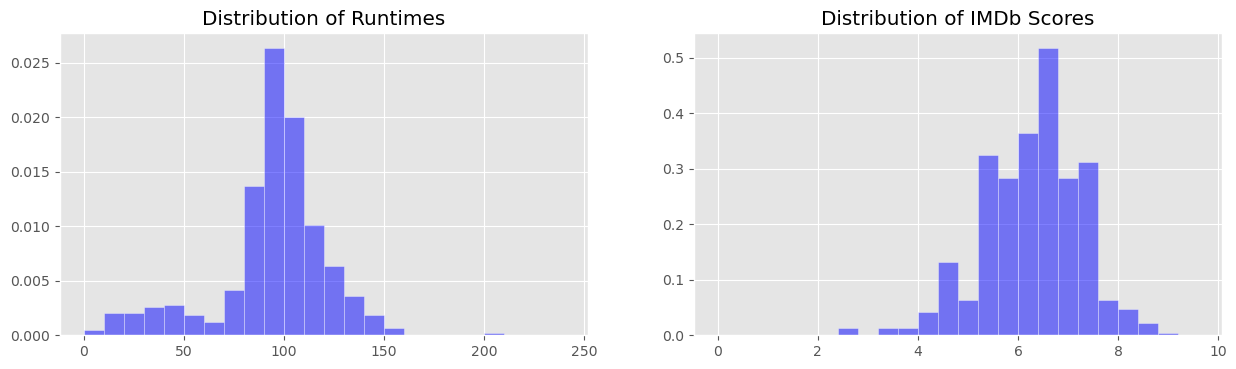

In [13]:
movie_stats = compute_statistics(movie_data)
movie_stats

Now, imagine that instead of having access to the full *population* of movies, we only have access to data on a smaller subset of movies, or a *sample*.  For 584 movies, it's not so unreasonable to expect to see all the data, but usually we aren't so lucky.  Instead, we often make *statistical inferences* about a large underlying population using a smaller sample.

**Statistical inference** is the process of using data in a sample to _infer_ some characteristic about the population from which the sample was drawn. A common strategy for statistical inference is to estimate parameters of the population by computing the same statistics on a sample. This strategy sometimes works well and sometimes doesn't.  The degree to which it gives us useful answers depends on several factors.

One very important factor in the utility of samples is how they were gathered. Let's look at some different sampling strategies.

### Convenience sampling
One sampling methodology, which is **generally a bad idea**, is to choose movies which are somehow convenient to sample.  For example, you might choose movies that you have personally watched, since it's easier to collect information about them.  This is called, somewhat pejoratively, *convenience sampling*.

**Question 2.1.**  Suppose you love scary movies 👻 and you decide to manually look up information on all Netflix Original movies in the following genres:
- `'Horror'`
- `'Thriller'`
- `'Horror thriller'`

Assign `convenience_sample` to a subset of `movie_data` that contains only the rows for movies that are in one of these genres.

In [14]:
convenience_sample = movie_data[(movie_data.get('Genre') == 'Horror') |
                                (movie_data.get('Genre') == 'Thriller') |
                                (movie_data.get('Genre') == 'Horror thriller')]
convenience_sample

,Genre,Premiere,Runtime,IMDb Score,Language
Title,,,,,
Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
The Open House,Horror thriller,"January 19, 2018",94,3.2,English
Mercy,Thriller,"November 22, 2016",90,4.2,English
Death Note,Horror thriller,"August 25, 2017",100,4.4,English
Secret Obsession,Thriller,"July 18, 2019",97,4.4,English
...,...,...,...,...,...
His House,Thriller,"October 30, 2020",93,6.5,English
Bulbbul,Horror,"June 24, 2020",94,6.6,Hindi
Calibre,Thriller,"June 29, 2018",101,6.8,English


In [15]:
grader.check("q2_1")

q2_1 results: All test cases passed!

**Question 2.2.** Assign `convenience_stats` to an array of the mean `'Runtime'` and mean `'IMDb Score'` of your convenience sample.  Since they're computed on a sample, these are called *sample means*. 

**_Hint_**: Use the function `compute_statistics`; it's okay if histograms are displayed as well.

array([103.55555556,   5.44444444])

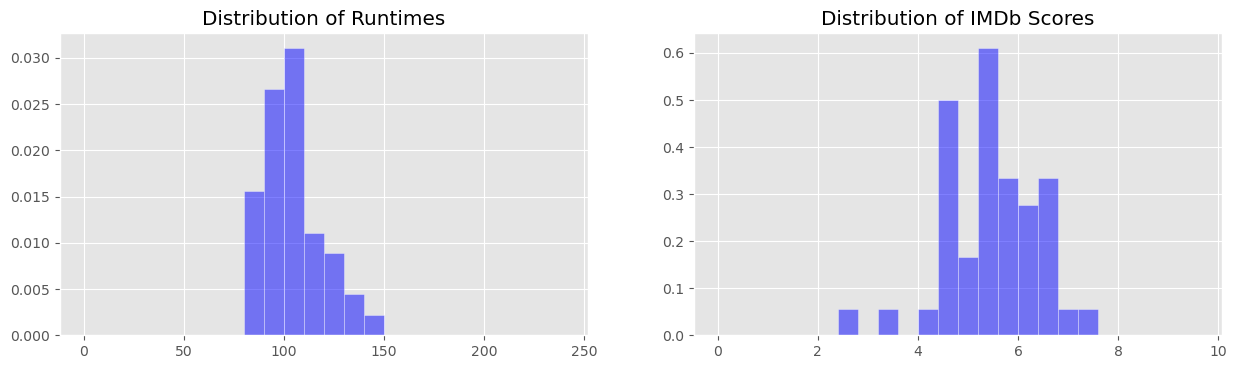

In [16]:
convenience_stats = compute_statistics(convenience_sample)
convenience_stats

In [17]:
grader.check("q2_2")

q2_2 results: All test cases passed!

Next, we'll compare the distribution of `'Runtime'` in our convenience sample to the distribution of `'Runtime'` for all the movies in our dataset.

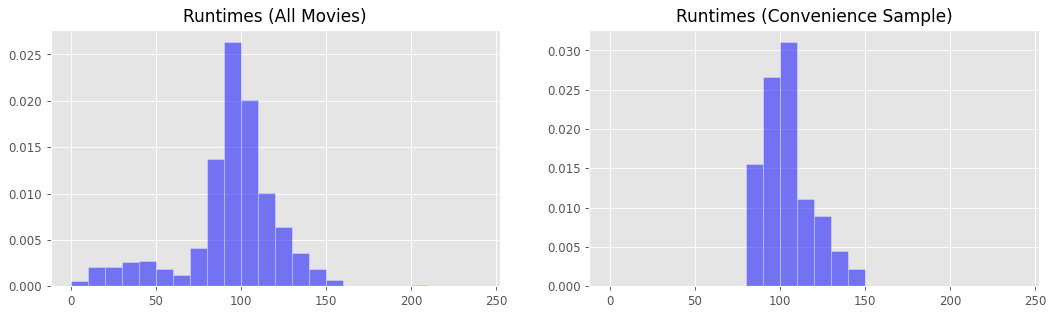

In [18]:
# Just run this cell, do not change it!
def compare_runtimes(first, second, first_title, second_title):
    """Compare the runtimes in two DataFrames."""
    bins = np.arange(0, 250, 10)
    
    plt.subplots(1, 2, figsize=(15, 4), dpi=85)

    plt.subplot(1, 2, 1)
    plt.hist(first.get('Runtime'), bins=bins, density=True, ec='w', color='blue', alpha=0.5)
    plt.title(f'Runtimes ({first_title})')
    
    plt.subplot(1, 2, 2)
    plt.hist(second.get('Runtime'), bins=bins, density=True, ec='w', color='blue', alpha=0.5)
    plt.title(f'Runtimes ({second_title})')

compare_runtimes(movie_data, convenience_sample, 'All Movies', 'Convenience Sample')

**Question 2.3.** From what you see in the histograms above, did the convenience sample give us an accurate picture of the runtimes for the full population of movies?  Why or why not?

Assign either 1, 2, 3, or 4 to the variable `sampling_q3` below. 
1. Yes. The sample is large enough, so it is an accurate representation of the population.
2. No. Normally convenience samples give us an accurate representation of the population, but only if the sample size is large enough. Our convenience sample here was too small.
3. No. Normally convenience samples give us an accurate representation of the population, but we just got unlucky.
4. No. Convenience samples generally don't give us an accurate representation of the population.

In [19]:
sampling_q3 = 4

In [20]:
grader.check("q2_3")

q2_3 results: All test cases passed!

### Simple random sampling
A more principled approach is to sample uniformly at random from the movies.  If we ensure that each movie is selected at most once, this is a **random sample without replacement**, sometimes abbreviated to "**simple random sample**" or "**SRS**".  Imagine writing down each movie's title on a card, putting the cards in a hat, and shuffling the hat.  To sample, pull out cards one by one and set them aside, stopping when the specified *sample size* is reached.

We've produced two simple random samples of `ratings_data`: the variable `small_srs_data` contains a SRS of size 70, and the variable `large_srs_data` contains a SRS of size 180.

Now we'll run the same analyses on the small simple random sample, the large simple random sample, and the convenience sample. The subsequent code draws the histograms and computes the means for `'Runtime'` and `'IMDb Score'`.

Full data stats:                  [93.57705479  6.27174658]
Small SRS stats: [94.74285714  6.16571429]
Large SRS stats: [93.66666667  6.27111111]
Convenience sample stats:         [103.55555556   5.44444444]


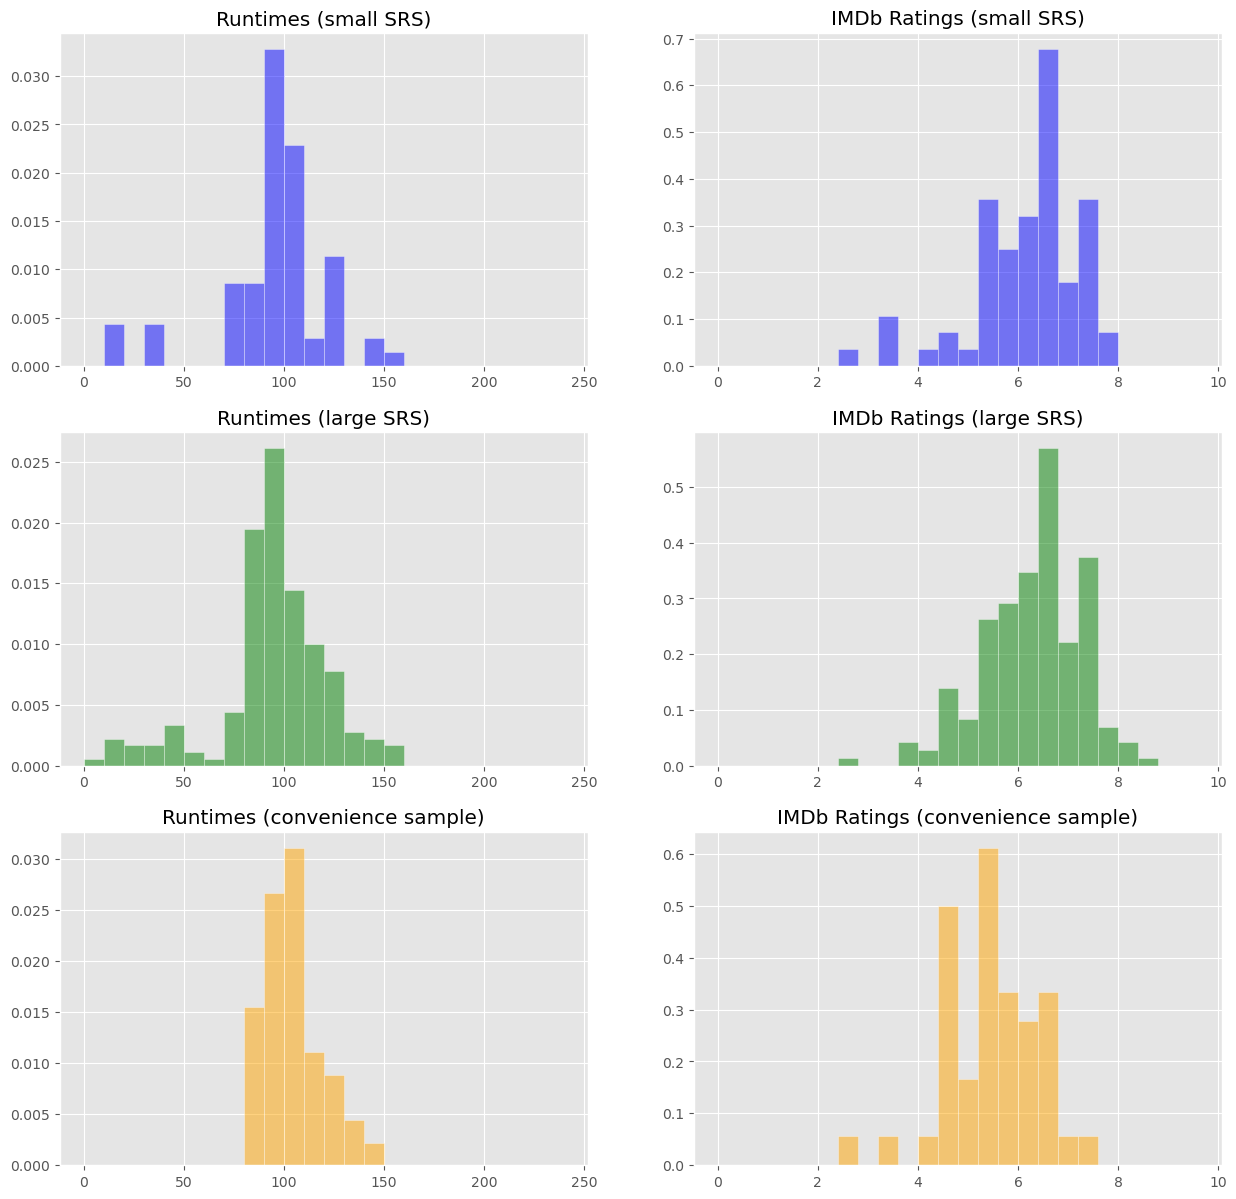

In [21]:
# Don't change this cell, but do run it.
small_srs_data = bpd.read_csv('data/small_srs_rating.csv').set_index('Title')
large_srs_data = bpd.read_csv('data/large_srs_rating.csv').set_index('Title')

small_stats = compute_statistics(small_srs_data, draw=False);
large_stats = compute_statistics(large_srs_data, draw=False);
convenience_stats = compute_statistics(convenience_sample, draw=False);

print('Full data stats:                 ', movie_stats)
print('Small SRS stats:', small_stats)
print('Large SRS stats:', large_stats)
print('Convenience sample stats:        ', convenience_stats)

color_dict = {
    'small SRS': 'blue',
    'large SRS': 'green',
    'convenience sample': 'orange'
}

plt.subplots(3, 2, figsize=(15, 15), dpi=100)
i = 1

for df, name in zip([small_srs_data, large_srs_data, convenience_sample], color_dict.keys()):
    plt.subplot(3, 2, i)
    i += 2
    plt.hist(df.get('Runtime'), density=True, alpha=0.5, color=color_dict[name], ec='w', 
             bins=np.arange(0, 250, 10))
    plt.title(f'Runtimes ({name})');

i = 2
for df, name in zip([small_srs_data, large_srs_data, convenience_sample], color_dict.keys()):
    plt.subplot(3, 2, i)
    i += 2
    plt.hist(df.get('IMDb Score'), density=True, alpha=0.5, color=color_dict[name], ec='w', 
             bins=np.arange(0, 10, 0.4))
    plt.title(f'IMDb Ratings ({name})');

### Producing simple random samples
Often it's useful to take random samples even when we have a larger dataset available.  One reason is that doing so can help us understand how inaccurate other samples are.

As we saw in Lecture 14, DataFrames have a `.sample` method for producing simple random samples.  Note that its default is to sample **without** replacement, which aligns with how simple random samples are drawn.

**Question 2.4.** Produce a simple random sample *without replacement* of size 70 from `movie_data`. Store an array containing the mean `'Runtime'` and mean `'IMDb Score'` of your SRS in `my_small_stats`. Again, it's fine if histograms are displayed.

array([95.65714286,  6.30428571])

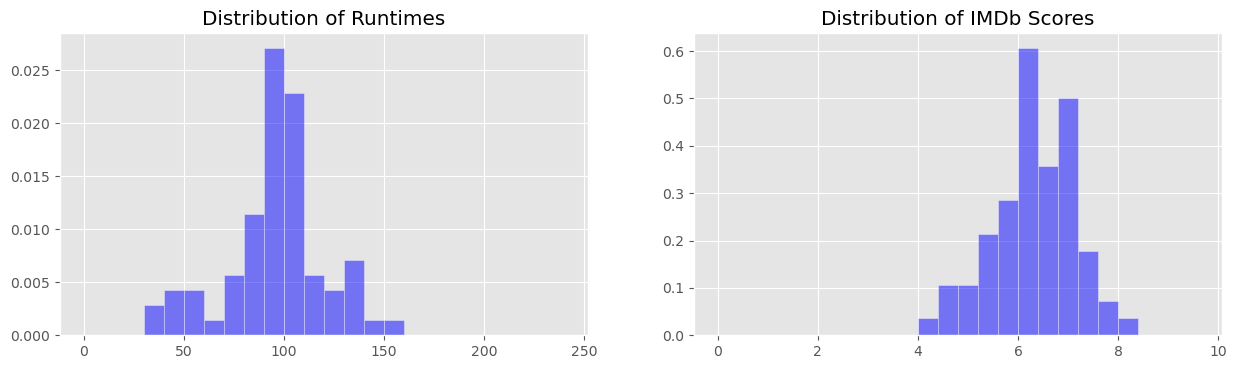

In [22]:
my_small_stats = compute_statistics(movie_data.sample(70))
my_small_stats

Run the cell in which `my_small_stats` is defined many times, to collect new samples and compute their sample means.

<br>

Now, recall, `small_stats` is an array containing the mean `'Runtime'` and mean `'IMDb Score'` for the one small SRS that we provided you with:

In [23]:
small_stats

array([94.74285714,  6.16571429])

Answer the following two-fold question:
- Are the values in `my_small_stats` (the mean `'Runtime'` and `'IMDb Score'` for **your** small SRS) similar to the values in `small_stats` (the mean `'Runtime'` and `'IMDb Score'` for the small SRS **we provided you with**)? 
- Each time you collect a new sample – i.e. each time you re-run the cell where `my_small_stats` is defined – do the values in `my_small_stats` change a lot?

Assign either 1, 2, 3, or 4 to the variable `sampling_q4` below.
1. The values in `my_small_stats` are identical to the values in `small_stats`, and change a bit each time a new sample is collected.
2. The values in `my_small_stats` are identical to the values in `small_stats`, and don't change at all each time a new sample is collected.
3. The values in `my_small_stats` are very different from the values in `small_stats`, and don't change at all each time a new sample is collected.
4. The values in `my_small_stats` are slightly different from the values in `small_stats`, and change a bit each time a new sample is collected.

<!--
BEGIN QUESTION
name: q2_4
-->

In [24]:
sampling_q4 = 4

In [25]:
grader.check("q2_4")

q2_4 results: All test cases passed!

**Question 2.5.** Similarly, create a simple random sample of size 180 from `movie_data` and store an array of the sample's mean `'Runtime'` and mean `'IMDb Score'` in `my_large_stats`.

array([92.72777778,  6.27111111])

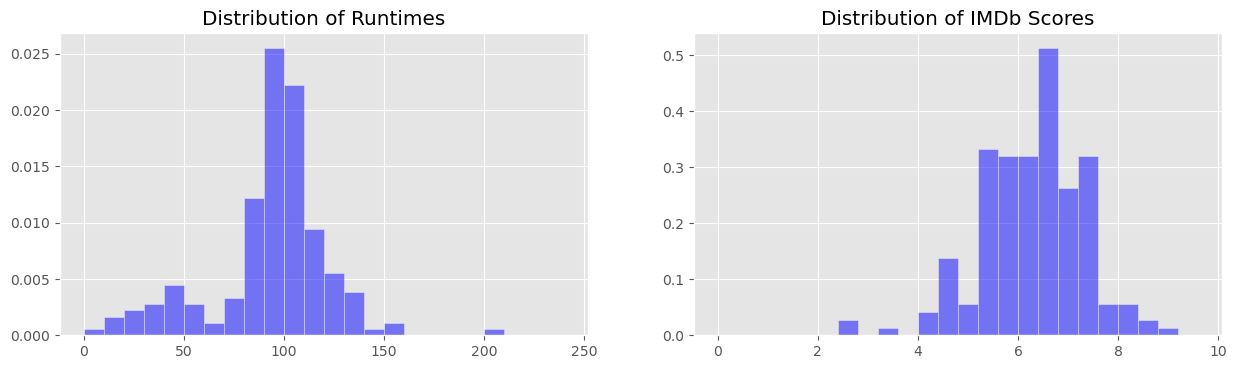

In [26]:
my_large_stats = compute_statistics(movie_data.sample(180))
my_large_stats

Run the cell in which `my_large_stats` is defined many times. Do the histograms and  mean statistics (mean `'Runtime'` and mean `'IMDb Score'`) seem to change more or less across samples of size 180 than across samples of size 70?

Assign either 1, 2, or 3 to the variable `sampling_q5` below. 

1. The statistics change *less* across samples of size 180 than across samples of size 70.
2. The statistics change an *equal amount* across samples of size 180 and across samples of size 70.
3. The statistics change *more* across samples of size 180 than across samples of size 70.

In [27]:
sampling_q5 = 1

In [28]:
grader.check("q2_5")

q2_5 results: All test cases passed!

## 3. Was it by Random Chansey? 🎲

<img src='data/chansey.png' width='250'>

You recently decided to buy the video game *Pokémon Yellow* from someone on Ebay. The seller tells you that they've modified the game so that the probabilities of encountering certain Pokémon in certain locations have been altered. However, the seller doesn't tell you which specific locations have had their probability models changed and what they've been changed to.

As you are playing *Pokémon Yellow*, you arrive at the Safari Zone, one of the most iconic locations in the game. You're curious as to your chances of encountering your favorite Pokémon, Chansey, in this location. You go onto [Bulbapedia](https://bulbapedia.bulbagarden.net/wiki/Kanto_Safari_Zone#Area_1) to find the probability model for this location, and you discover that for each Pokémon encounter in the Safari Zone, there is a 4% chance of encountering Chansey. 

After a few hours of gameplay in the Safari Zone, you have encountered Chansey only 23 times out of 784 total Pokémon encounters (around 2.9%). You start to suspect that the Safari Zone may have been one of the locations in which the previous owner of the game changed the probability model.

To test this, you decide to run a hypothesis test with the following hypotheses:

**Null Hypothesis**: In your copy of *Pokémon Yellow*, the probability of encountering Chansey at each Pokémon encounter in the Safari Zone is 4%. 

**Alternative Hypothesis**: In your copy of *Pokémon Yellow*, the probability of encountering Chansey at each Pokémon encounter in the Safari Zone is less than 4%.

**Question 3.1.** Complete the implementation of the function `one_simulation`, which has no arguments. It should randomly generate 784 Pokémon encounters in the Safari Zone and return the **proportion** of encountered Pokémon that were Chansey. 

*Hint*: Use `np.random.multinomial`.

In [29]:
def one_simulation():
    repetitions = 784
    probabilities = [0.04, 0.96]
    proportion = np.random.multinomial(repetitions, probabilities)
    return proportion[0] / repetitions
one_simulation()

0.04081632653061224

In [30]:
grader.check("q3_1")

q3_1 results: All test cases passed!

**Question 3.2.** The test statistic for our hypothesis test will be the difference between the proportion of Chansey encounters in a given sample of 784 Safari Zone encounters and the expected proportion of Chansey encounters, i.e.

$$\text{test statistic} = \text{proportion of Chansey encounters in sample} - 0.04$$


Let's conduct 10,000 simulations. Create an array named `proportion_diffs` containing 10,000 simulated values of the test statistic described above. Utilize the function created in the previous question to perform this task.

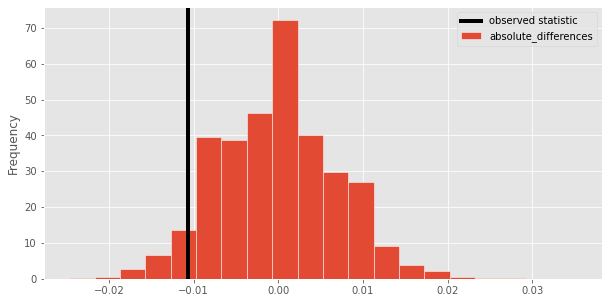

In [31]:
proportion_diffs = np.array([])
sim_repetitions = 10000
for i in range(sim_repetitions):
    proportion_diffs = np.append(proportion_diffs, one_simulation() - 0.04)

# Visualize with a histogram. Don't change anything below.
bpd.DataFrame().assign(absolute_differences=proportion_diffs).plot(kind='hist', bins=20, density=True, ec='w', figsize=(10, 5));
plt.axvline(x=(23 / 784 - 0.04), color='black', linewidth=4, label='observed statistic')
plt.legend();

In [32]:
grader.check("q3_2")

q3_2 results: All test cases passed!

**Question 3.3.** Calculate the p-value for this hypothesis test, and assign the result to `safari_zone_p`.

*Hint*: Do large values of our test statistic favor the alternative hypothesis, or do small values of our test statistic favor the alternative hypothesis?

In [33]:
safari_zone_p = np.count_nonzero(proportion_diffs <= 23 / 784 - 0.04) / sim_repetitions
safari_zone_p

0.0708

In [34]:
grader.check("q3_3")

q3_3 results: All test cases passed!

**Question 3.4.** Using the standard p-value cutoff of 0.05, what can we conclude from our hypothesis test? Assign either 1, 2, 3, or 4 to the variable `safari_zone_conclusion`, corresponding to the best conclusion.
   
   1. We reject the null hypothesis. There is not enough evidence to say whether the observed data is consistent with the model.
   1. We reject the null hypothesis. The observed data is inconsistent with the model.
   1. We accept the null hypothesis. The observed data is consistent with the model.
   1. We fail to reject the null hypothesis. There is not enough evidence to say that the observed data is inconsistent with the model.

In [35]:
safari_zone_conclusion = 4

In [36]:
grader.check("q3_4")

q3_4 results: All test cases passed!

**Question 3.5.** In this question, we chose as our test statistic the proportion of Chansey encounters in the Safari Zone minus 0.04. But this is not the only statistic we could have chosen; there are many that could have worked here. 

From the options below, choose the test statistic that would **not** have worked for this hypothesis test, and assign 1, 2, 3, or 4 to the variable `bad_choice`.

1. The number of Chansey encounters out of 784 enounters in the Safari Zone.
1. The proportion of Chansey encounters in the Safari Zone.
1. 0.04 minus the proportion of Chansey encounters in the Safari Zone.
1. The absolute difference between 0.04 and the proportion of Chansey encounters in the Safari Zone.

*Hint*: Our goal is to find a test statistic that will help us determine whether we encounter Chansey **less** often than expected.

In [37]:
bad_choice = 4
bad_choice

4

In [38]:
grader.check("q3_5")

q3_5 results: All test cases passed!

## 4. <span style='color:#FF1480'> Surprise Mini Brands!</span>  🍭🧴🩹

When you buy a Surprise Mini Brands toy, you open it up to reveal tiny replicas of branded supermarket products. Here are some of the possible items you may see when opening a Surprise Mini Brands toy:
<img src='data/minibrand.png' width='650'>

No, that is not real pasta sauce!

There are four types of replicas in a Surprise Mini Brands toy: `'Gold'`, `'Metallic'`, `'Glow in the Dark'`, and `'Common'`. The first three are "rare" types, which are made of special materials.

Unfortunately, Zuru, the company behind Surprise Mini Brands, doesn't make public the probability of getting any of the four types of replicas. A DSC 10 tutor proposed the following probability distribution:

| Type | Estimated Probability of Type |
| --- | --- |
| Gold | $\frac{1}{15}$ |
| Metallic | $\frac{1}{15}$ |
| Glow in the Dark | $\frac{1}{30}$ |
| Common | $\frac{5}{6}$ |

We'll store this distribution in an array, in the order `'Gold'`, `'Metallic'`, `'Glow in the Dark'`, and `'Common'`:

In [39]:
# Just run this cell, do not change it!
type_distribution_tutor = np.array([1 / 15, 1 / 15, 1 / 30, 5 / 6])
type_distribution_tutor

array([0.06666667, 0.06666667, 0.03333333, 0.83333333])

To assess the validity of their model, the tutor surveyed many individuals who purchased Surprise Mini Brands toys and asked them for the types of replicas they received. In total, they were given information about 15,525 replicas, out of which:
- 818 were `'Gold'`,
- 976 were `'Metallic'`,
- 412 were `'Glow in the Dark'`, and
- the rest were `'Common'`.

We can calculate the **empirical** type distribution using survey data and store it in an array as well (in the same order as before):

In [40]:
# Just run this cell, do not change it!
empirical_type_distribution = np.array([818, 976, 412, (15525 - 818 - 976 - 412)]) / 15525
empirical_type_distribution

array([0.05268921, 0.06286634, 0.02653784, 0.8579066 ])

While `empirical_type_distribution` is not identical to `type_distribution_tutor`, it's still possible that the tutor's model is plausible, and that the observed differences are due to random chance. Let's run a hypothesis test to investigate further, using the following hypotheses: 

**Null Hypothesis**: The types of Surprise Mini Brands toys are drawn randomly from the distribution `type_distribution_tutor`.

**Alternative Hypothesis**: The types of Surprise Mini Brands toys are _not_ drawn randomly from the distribution `type_distribution_tutor`.

Note that this hypothesis test involves four proportions – one for each of `'Gold'`, `'Metallic'`, `'Glow in the Dark'`, and `'Common'`.

**Question 4.1.**  Which of the following is **not** a reasonable choice of test statistic for this hypothesis test? Assign 1, 2, or 3 to the variable `unreasonable_test_statistic`. 
1. The total variation distance between the proposed distribution (expected proportion of types) and the empirical distribution (actual proportion of types).
2. The sum of the absolute difference between the proposed distribution (expected proportion of types) and the empirical distribution (actual proportion of types).
3. The absolute difference between the sum of the proposed distribution (expected proportion of types) and the sum of the empirical distribution (actual proportion of types).

In [41]:
unreasonable_test_statistic = 3

In [42]:
grader.check("q4_1")

q4_1 results: All test cases passed!

**Question 4.2.** We'll use the TVD, i.e. **total variation distance**, as our test statistic. Below, complete the implementation of the function `total_variation_distance`, which takes in two distributions (stored as arrays) as arguments and returns the total variation distance between the two arrays.

Then, use the function `total_variation_distance` to determine the TVD between the type distribution proposed by the tutor and the empirical type distribution observed. Assign this TVD to `observed_tvd`.

In [43]:
def total_variation_distance(first_distrib, second_distrib):
    '''Computes the total variation distance between two distributions.'''
    return np.abs(first_distrib - second_distrib).sum() / 2

observed_tvd = total_variation_distance(type_distribution_tutor, empirical_type_distribution)
observed_tvd

0.024573268921095015

In [44]:
grader.check("q4_2")

q4_2 results: All test cases passed!

**Question 4.3.** Now, we'll calculate 5,000 simulated TVDs to see what a typical TVD between the proposed distribution and an empirical distribution would look like if the tutor's model were accurate. Since our real-life data includes 15,525 replicas, in each trial of the simulation, we'll:
- draw 15,525 replicas at random from the tutor's proposed distribution, then 
- calculate the TVD between the **type distribution proposed by the tutor** and the **empirical type distribution from the simulated sample**. 

Store these 5,000 simulated TVDs in an array called `simulated_tvds`.

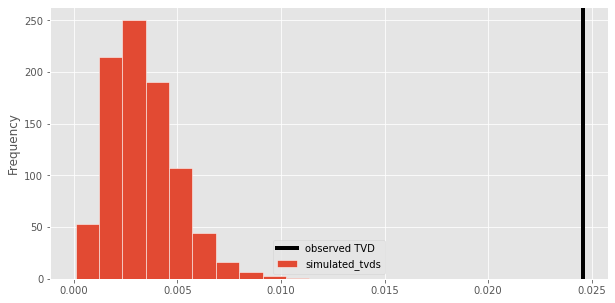

In [45]:
simulated_tvds = np.array([])
sim_repetitions = 5000
replica_repetitions = 15525
for i in range(sim_repetitions):
    sample_distribution = np.random.multinomial(replica_repetitions, type_distribution_tutor) / replica_repetitions
    simulated_tvds = np.append(simulated_tvds, total_variation_distance(type_distribution_tutor, sample_distribution))

# Visualize the distribution of TVDs with a histogram
bpd.DataFrame().assign(simulated_tvds=simulated_tvds).plot(kind='hist', density=True, ec='w', figsize=(10, 5));
plt.axvline(x=observed_tvd, color='black', linewidth=4, label='observed TVD')
plt.legend();

In [46]:
grader.check("q4_3")

q4_3 results: All test cases passed!

**Question 4.4.** Now, check the p-value of our test by computing the proportion of times in our simulation that we saw a TVD greater than or equal to our observed TVD. Assign your result to `type_p_value`.

In [47]:
type_p_value = np.count_nonzero(simulated_tvds >= observed_tvd) / sim_repetitions
type_p_value

0.0

In [48]:
grader.check("q4_4")

q4_4 results: All test cases passed!

**Question 4.5.** Using the standard p-value cutoff of 0.05, what can we conclude from our hypothesis test? Assign either 1, 2, 3, or 4 to the variable `type_conclusion`, corresponding to the best conclusion.
   
   1. We reject the null hypothesis. There is not enough evidence to say whether the observed data is consistent with the model.
   1. We reject the null hypothesis. The observed data is inconsistent with the model.
   1. We accept the null hypothesis. The observed data is consistent with the model.
   1. We fail to reject the null hypothesis. There is not enough evidence to say that the observed data is inconsistent with the model.

In [49]:
type_conclusion = 2
type_conclusion

2

In [50]:
grader.check("q4_5")

q4_5 results: All test cases passed!

## Finish Line 🏁

To submit your assignment:

1. Select `Kernel -> Restart & Run All` to ensure that you have executed all cells, including the test cells.
2. Read through the notebook to make sure everything is fine and all tests passed.
3. Run the cell below to run all tests, and make sure that they all pass.
4. Download your notebook using `File -> Download as -> Notebook (.ipynb)`, then upload your notebook to Gradescope.

In [51]:
grader.check_all()

q1_1 results: All test cases passed!

q1_2 results: All test cases passed!

q1_3 results: All test cases passed!

q1_4 results: All test cases passed!

q2_1 results: All test cases passed!

q2_2 results: All test cases passed!

q2_3 results: All test cases passed!

q2_4 results: All test cases passed!

q2_5 results: All test cases passed!

q3_1 results: All test cases passed!

q3_2 results: All test cases passed!

q3_3 results: All test cases passed!

q3_4 results: All test cases passed!

q3_5 results: All test cases passed!

q4_1 results: All test cases passed!

q4_2 results: All test cases passed!

q4_3 results: All test cases passed!

q4_4 results: All test cases passed!

q4_5 results: All test cases passed!